In [33]:
#Importing Libraries:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [5]:
#Loading the Dataset:
weather = pd.read_csv("/content/weather - weather.csv")

Data Preprocessing:

In [6]:
weather.head()

,precipitation,temp_max,temp_min,wind,weather
0,0.0,12.8,5.0,4.7,drizzle
1,10.9,10.6,2.8,4.5,rain
2,0.8,11.7,7.2,2.3,rain
3,20.3,12.2,5.6,4.7,rain
4,1.3,8.9,2.8,6.1,rain


In [7]:
weather.shape

(1461, 5)

In [8]:
weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1461 entries, 0 to 1460
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   precipitation  1461 non-null   float64
 1   temp_max       1461 non-null   float64
 2   temp_min       1461 non-null   float64
 3   wind           1461 non-null   float64
 4   weather        1461 non-null   object 
dtypes: float64(4), object(1)
memory usage: 57.2+ KB


In [9]:
weather.isnull().sum()

precipitation    0
temp_max         0
temp_min         0
wind             0
weather          0
dtype: int64

In [10]:
weather.drop_duplicates()

,precipitation,temp_max,temp_min,wind,weather
0,0.0,12.8,5.0,4.7,drizzle
1,10.9,10.6,2.8,4.5,rain
2,0.8,11.7,7.2,2.3,rain
3,20.3,12.2,5.6,4.7,rain
4,1.3,8.9,2.8,6.1,rain
...,...,...,...,...,...
1456,8.6,4.4,1.7,2.9,rain
1457,1.5,5.0,1.7,1.3,rain
1458,0.0,7.2,0.6,2.6,fog
1459,0.0,5.6,-1.0,3.4,sun


In [11]:
weather.shape

(1461, 5)

Feature Extraction:

In [12]:
print(weather['weather'].unique())

['drizzle' 'rain' 'sun' 'snow' 'fog']


In [13]:
weather['weather'].value_counts()

rain       641
sun        640
fog        101
drizzle     53
snow        26
Name: weather, dtype: int64

In [14]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
le.fit(list(weather['weather']))
weather['weather_cat'] = weather['weather'].apply(lambda x: le.transform([x])[0])
weather[['weather','weather_cat']].value_counts()
     

weather  weather_cat
rain     2              641
sun      4              640
fog      1              101
drizzle  0               53
snow     3               26
dtype: int64

In [15]:
weather.head()

,precipitation,temp_max,temp_min,wind,weather,weather_cat
0,0.0,12.8,5.0,4.7,drizzle,0
1,10.9,10.6,2.8,4.5,rain,2
2,0.8,11.7,7.2,2.3,rain,2
3,20.3,12.2,5.6,4.7,rain,2
4,1.3,8.9,2.8,6.1,rain,2


In [16]:
weather['temp_avg'] = (weather['temp_max']+ weather['temp_min'])/2

In [17]:
weather.head()

,precipitation,temp_max,temp_min,wind,weather,weather_cat,temp_avg
0,0.0,12.8,5.0,4.7,drizzle,0,8.90
1,10.9,10.6,2.8,4.5,rain,2,6.70
2,0.8,11.7,7.2,2.3,rain,2,9.45
3,20.3,12.2,5.6,4.7,rain,2,8.90
4,1.3,8.9,2.8,6.1,rain,2,5.85


In [18]:
weather = weather[['precipitation', 'wind', 'weather_cat', 'temp_avg']]

In [19]:
weather.head()

,precipitation,wind,weather_cat,temp_avg
0,0.0,4.7,0,8.90
1,10.9,4.5,2,6.70
2,0.8,2.3,2,9.45
3,20.3,4.7,2,8.90
4,1.3,6.1,2,5.85


In [20]:
weather.shape

(1461, 4)

In [21]:
weather.dropna(inplace = True)

/usr/local/lib/python3.8/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


Data Visualization:

<function matplotlib.pyplot.show(*args, **kw)>

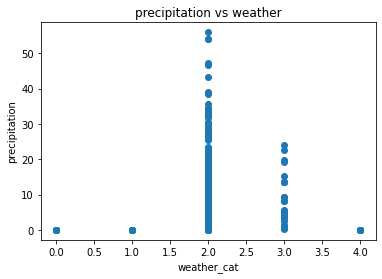

In [22]:
plt.scatter(weather['weather_cat'], weather['precipitation'])
plt.xlabel('weather_cat')
plt.ylabel('precipitation')
plt.title('precipitation vs weather')
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

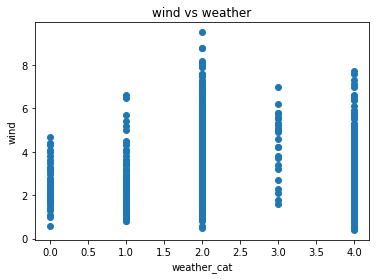

In [23]:
plt.scatter(weather['weather_cat'], weather['wind'])
plt.xlabel('weather_cat')
plt.ylabel('wind')
plt.title('wind vs weather')
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

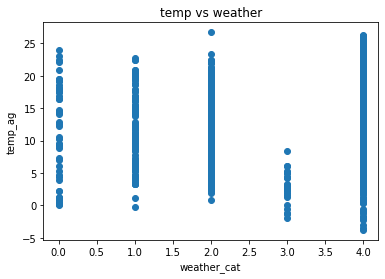

In [24]:
plt.scatter(weather['weather_cat'], weather['temp_avg'])
plt.xlabel('weather_cat')
plt.ylabel('temp_ag')
plt.title('temp vs weather')
plt.show

Input Variables and Output Variables:

In [25]:
X = weather.iloc[:, [0,1,3]]
Y = weather['weather_cat']

Splitting of Dataset:

In [26]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3)

In [27]:
X_train.shape

(1022, 3)

Logistic Regression:

In [35]:
sc_x = StandardScaler()
X_train = sc_x.fit_transform(X_train)
X_test = sc_x.transform(X_test)

print (X_train[0:10, :])


[[-0.09498055 -0.31121137 -1.19369117]
 [ 1.63057599  1.80026031 -1.27698711]
 [-0.44311915 -0.52235853  0.47222768]
 [-0.44311915 -0.38159376  1.1719136 ]
 [-0.44311915  1.2372012  -0.58563079]
 [-0.44311915 -0.38159376  1.77164438]
 [-0.44311915  0.67414208 -2.20157207]
 [ 1.17648216  0.5333773  -0.49400525]
 [-0.09498055 -0.24082898  1.3135167 ]
 [-0.44311915 -0.94465287  0.89703699]]


In [36]:
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, Y_train)

LogisticRegression(random_state=0)

In [37]:
Y_pred = classifier.predict(X_test)

In [38]:
cm = confusion_matrix(Y_test, Y_pred)

print ("Confusion Matrix : \n", cm)

Confusion Matrix : 
 [[  0   0   0   0  13]
 [  0   0   0   0  27]
 [  0   0 159   0  39]
 [  0   0   8   0   0]
 [  0   0   0   1 192]]


In [39]:
print ("Accuracy : ", accuracy_score(Y_test, Y_pred))

Accuracy :  0.7995444191343963
